In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from torchvision import datasets, transforms, models

In [2]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘Dataset’: File exists


In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip intel-image-classification  -d  Dataset  

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/seg_train/seg_train/mountain/7537.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7539.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7551.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7560.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7565.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7578.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7581.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7586.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7647.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7652.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7654.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7662.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/767.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7672.jpg  
  inflating: Dataset/seg_train/seg_train/mountain/7679.jpg  
  inflating: Dataset/seg_train/seg_

In [0]:
train_transforms = transforms.Compose([transforms.Resize((150,150)),
                                      transforms.ColorJitter(),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])
                                      ])

In [0]:
test_transforms = transforms.Compose([transforms.Resize((150,150)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5]),
                                      
                                     
])

In [0]:
train_data = datasets.ImageFolder('Dataset/seg_train/seg_train',transform=train_transforms)

In [0]:
test_data=datasets.ImageFolder('Dataset/seg_test/seg_test',transform=test_transforms)

In [0]:
model=models.vgg16(pretrained=True)


In [0]:
for param in model.features.parameters():
    param.requires_grad = False

In [11]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
model.classifier=nn.Sequential(
     nn.Linear(in_features=25088, out_features=4096, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=4096, out_features=1000, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=1000, out_features=1000, bias=True),
     nn.ReLU(),
     nn.Dropout(p=0.6,inplace=False),
     nn.Linear(in_features=1000,out_features=512),
     nn.ReLU(),
     nn.Linear(in_features=512,out_features=6)
)

In [21]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.000025)

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:

train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=256, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=64, 
                                          shuffle=False)

In [0]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      
      inputs, targets = inputs.to(device), targets.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)

      loss = criterion(outputs, targets)
        

      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

  
    train_loss = np.mean(train_loss) 
    
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)


    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [34]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=20)

Epoch 1/20, Train Loss: 1.0459,       Test Loss: 0.4624, Duration: 0:00:46.929371
Epoch 2/20, Train Loss: 0.3839,       Test Loss: 0.3193, Duration: 0:00:46.785873
Epoch 3/20, Train Loss: 0.2986,       Test Loss: 0.2955, Duration: 0:00:46.265976
Epoch 4/20, Train Loss: 0.2645,       Test Loss: 0.2901, Duration: 0:00:46.247678
Epoch 5/20, Train Loss: 0.2472,       Test Loss: 0.2674, Duration: 0:00:46.013122
Epoch 6/20, Train Loss: 0.2255,       Test Loss: 0.2532, Duration: 0:00:46.065703
Epoch 7/20, Train Loss: 0.2115,       Test Loss: 0.2564, Duration: 0:00:45.973694
Epoch 8/20, Train Loss: 0.1980,       Test Loss: 0.2515, Duration: 0:00:45.857173
Epoch 9/20, Train Loss: 0.1896,       Test Loss: 0.2450, Duration: 0:00:45.808835
Epoch 10/20, Train Loss: 0.1787,       Test Loss: 0.2401, Duration: 0:00:45.664007
Epoch 11/20, Train Loss: 0.1724,       Test Loss: 0.2419, Duration: 0:00:45.873806
Epoch 12/20, Train Loss: 0.1656,       Test Loss: 0.2433, Duration: 0:00:45.623308
Epoch 13/20, 

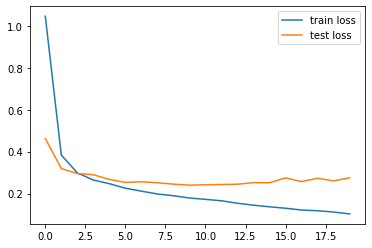

In [35]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [36]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:

  inputs, targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:

  inputs, targets = inputs.to(device), targets.to(device)


  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9689, Test acc: 0.9130


In [0]:
torch.save(model.state_dict,'Model/VGG-16_v1')

In [0]:
from PIL import Image
import numpy as np

In [0]:
img = Image.open('Dataset/seg_pred/seg_pred/3966.jpg')


In [0]:
nimg = np.array(img)

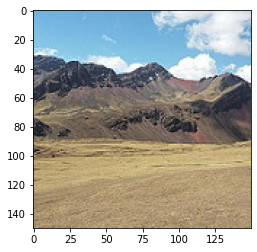

In [42]:
plt.imshow(nimg)


In [0]:
pimg = test_transforms(img).unsqueeze(0).to(device)

In [44]:
pimg.shape


torch.Size([1, 3, 150, 150])

In [0]:
prediction = model(pimg)

In [0]:
_, tpredict = torch.max(prediction, 1)

In [57]:
classes={
    0:'Buuildings',
    1:'Forest',
    2:'Glacier',
    3:'Mountain',
    4:'Sea',
    5:'Street'
}

print(tpredict)
print(classes[tpredict[0].item()])


tensor([3], device='cuda:0')
Mountain
